In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
irisdf=pd.read_csv("iris.csv")
irisdf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
np.unique(irisdf["Species"])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
class1= irisdf[ irisdf["Species"]=="Iris-setosa"]
class2 =irisdf[ irisdf["Species"]=="Iris-versicolor"]
class3 =irisdf[ irisdf["Species"]=="Iris-virginica"]

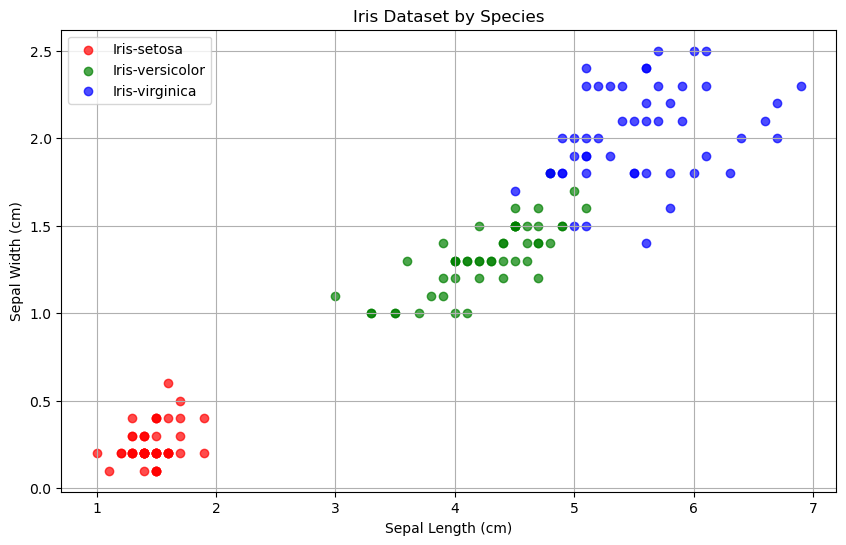

In [6]:
plt.figure(figsize=(10, 6))

# Plot each species with different colors
for species, color in zip(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
                         ['red', 'green', 'blue']):
    subset = irisdf[irisdf['Species'] == species]
    plt.scatter(subset['PetalLengthCm'], subset['PetalWidthCm'],
                label=species, color=color, alpha=0.7)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset by Species')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
def introduce_nans(df, fraction=0.1):
    """
    fonction pour replacer quelque donner par Nan
    """
    mask = np.random.random(df.shape) < fraction
    df_missing = df.mask(mask)
    return df_missing
irismissing=introduce_nans(irisdf)

In [8]:
irismissing["Species"]=irisdf["Species"]
irismissing

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.0,5.1,3.5,1.4,0.2,Iris-setosa
1,2.0,4.9,3.0,1.4,0.2,Iris-setosa
2,3.0,NaN,3.2,1.3,0.2,Iris-setosa
3,4.0,4.6,3.1,NaN,0.2,Iris-setosa
4,5.0,5.0,NaN,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146.0,6.7,3.0,5.2,2.3,Iris-virginica
146,147.0,NaN,2.5,5.0,1.9,Iris-virginica
147,148.0,6.5,3.0,5.2,2.0,Iris-virginica
148,149.0,6.2,3.4,5.4,2.3,Iris-virginica


# Mean Imputation

In [9]:
def replace_missingvalue_by_mean(df):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    # Fill only numeric columns with their mean
    df_filled = df.copy()
    df_filled[numeric_cols] = df_filled[numeric_cols].fillna(df[numeric_cols].mean())
    return df_filled

# Usage
iris_filled = replace_missingvalue_by_mean(irismissing)

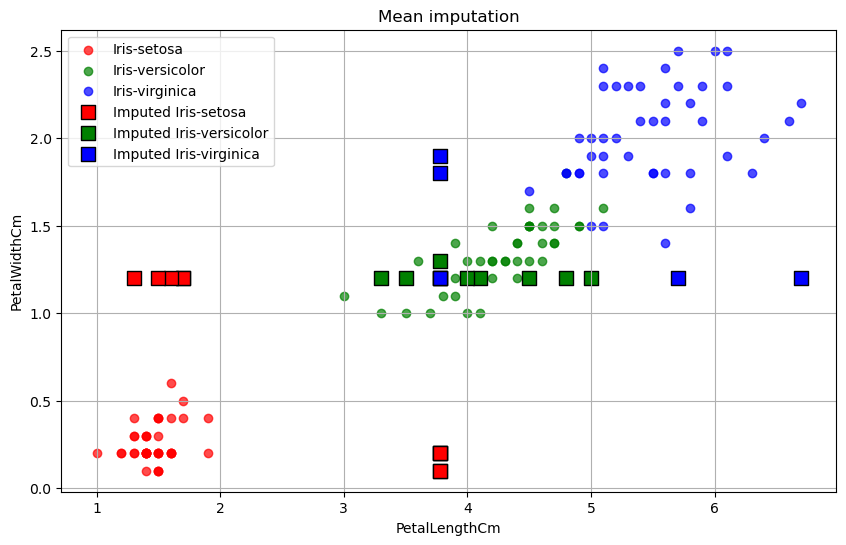

In [10]:
def plot_with_replaced_values(df_original, df_filled, feature_x="PetalLengthCm", feature_y="PetalWidthCm",title=""):
    
    plt.figure(figsize=(10, 6))
    
    # Find which values were imputed (were NaN in original but not in filled)
    imputed_mask = df_original[feature_x].isna() | df_original[feature_y].isna()
    
    # Get unique species
    species = df_filled['Species'].unique()
    colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
    
    # Plot all points (circles)
    for spec in species:
        subset = df_filled[df_filled['Species'] == spec]
        plt.scatter(subset[feature_x], subset[feature_y], 
                   c=colors[spec], label=spec, alpha=0.7)
    
    # Overlay imputed points (squares)
    for spec in species:
        subset = df_filled[(df_filled['Species'] == spec) & imputed_mask]
        plt.scatter(subset[feature_x], subset[feature_y], 
                   c=colors[spec], marker='s', s=100, 
                   edgecolor='black', linewidth=1, label=f'Imputed {spec}')
    
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_with_replaced_values(irismissing,iris_filled,"PetalLengthCm","PetalWidthCm",title="Mean imputation")
    


# KNN

In [11]:
#supprimer les colonnes quie contient les labels
x_train=irismissing.values[:,:-1]
x_train

array([[1.0, 5.1, 3.5, 1.4, 0.2],
       [2.0, 4.9, 3.0, 1.4, 0.2],
       [3.0, nan, 3.2, 1.3, 0.2],
       [4.0, 4.6, 3.1, nan, 0.2],
       [5.0, 5.0, nan, 1.4, 0.2],
       [6.0, 5.4, 3.9, 1.7, 0.4],
       [7.0, 4.6, 3.4, 1.4, 0.3],
       [8.0, 5.0, 3.4, 1.5, 0.2],
       [9.0, nan, 2.9, 1.4, 0.2],
       [10.0, 4.9, 3.1, 1.5, 0.1],
       [11.0, nan, 3.7, 1.5, 0.2],
       [12.0, 4.8, 3.4, 1.6, 0.2],
       [13.0, 4.8, 3.0, 1.4, 0.1],
       [14.0, nan, 3.0, nan, 0.1],
       [15.0, 5.8, 4.0, 1.2, 0.2],
       [16.0, 5.7, nan, 1.5, 0.4],
       [nan, 5.4, 3.9, 1.3, 0.4],
       [18.0, 5.1, 3.5, 1.4, 0.3],
       [19.0, 5.7, 3.8, 1.7, nan],
       [20.0, 5.1, 3.8, 1.5, 0.3],
       [21.0, 5.4, 3.4, 1.7, nan],
       [22.0, 5.1, 3.7, 1.5, 0.4],
       [23.0, nan, 3.6, 1.0, 0.2],
       [nan, 5.1, 3.3, 1.7, 0.5],
       [25.0, 4.8, 3.4, 1.9, 0.2],
       [26.0, 5.0, 3.0, 1.6, 0.2],
       [27.0, 5.0, 3.4, 1.6, 0.4],
       [nan, 5.2, 3.5, 1.5, 0.2],
       [29.0, 5.2, 3.4, 1.4, 0.2

In [12]:
def euclidean_distance( x1, x2):
    return np.sqrt(sum((a - b) ** 2 for a, b in zip(x1, x2)))


In [64]:
import numpy as np

class SimpleKNNImputer:
    def __init__(self, k=3):
        self.k = k
    
    def impute(self, data):
        data = np.array(data, dtype=float)
        complete_data = data[~np.isnan(data).any(axis=1)]  # Rows without missing values
        
        for i in range(len(data)):
            if np.isnan(data[i]).any():  # If row has missing values
                # Find distances to complete rows
                distances = [self._euclidean_distance(data[i], row) for row in complete_data]
                
                # Get indices of k nearest neighbors
                nearest_indices = np.argsort(distances)[:self.k]
                
                # Impute each missing value with mean of neighbors
                for col in range(data.shape[1]):
                    if np.isnan(data[i, col]):
                        neighbor_values = [complete_data[idx, col] for idx in nearest_indices]
                        data[i, col] = np.nanmean(neighbor_values)
        
        return data
    
    def _euclidean_distance(self, a, b):
        """Calculate Euclidean distance between two vectors, ignoring NaN values"""
        valid_mask = ~np.isnan(a) & ~np.isnan(b)
        if np.any(valid_mask):
            return np.sqrt(np.sum((a[valid_mask] - b[valid_mask])**2))
        return np.inf  # Return infinite distance if no valid comparison


In [14]:
imputer = SimpleKNNImputer(k=5)
knn_imputer= imputer.impute(x_train)

label_columns=irismissing.values[:,-1]
#ajouter le columns de label
knn_filled_iriss_vaues=np.c_[knn_imputer,label_columns]


In [15]:
knn_filled_iriss_vaues

array([[1.0, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [2.0, 4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [3.0, 5.0, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.0, 4.6, 3.1, 1.48, 0.2, 'Iris-setosa'],
       [5.0, 5.0, 3.4400000000000004, 1.4, 0.2, 'Iris-setosa'],
       [6.0, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [7.0, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [8.0, 5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [9.0, 4.94, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [10.0, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [11.0, 4.82, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [12.0, 4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [13.0, 4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [14.0, 5.08, 3.0, 1.42, 0.1, 'Iris-setosa'],
       [15.0, 5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [16.0, 5.7, 3.54, 1.5, 0.4, 'Iris-setosa'],
       [23.8, 5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [18.0, 5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [19.0, 5.7, 3.8, 1.7, 0.27999999999999997, 'Iris-setosa'],
       [20.0, 5.1, 3.8

In [16]:
filled_by_knn=pd.DataFrame(knn_filled_iriss_vaues,columns=irismissing.columns)

In [17]:
filled_by_knn

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.0,5.1,3.5,1.4,0.2,Iris-setosa
1,2.0,4.9,3.0,1.4,0.2,Iris-setosa
2,3.0,5.0,3.2,1.3,0.2,Iris-setosa
3,4.0,4.6,3.1,1.48,0.2,Iris-setosa
4,5.0,5.0,3.44,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146.0,6.7,3.0,5.2,2.3,Iris-virginica
146,147.0,6.58,2.5,5.0,1.9,Iris-virginica
147,148.0,6.5,3.0,5.2,2.0,Iris-virginica
148,149.0,6.2,3.4,5.4,2.3,Iris-virginica


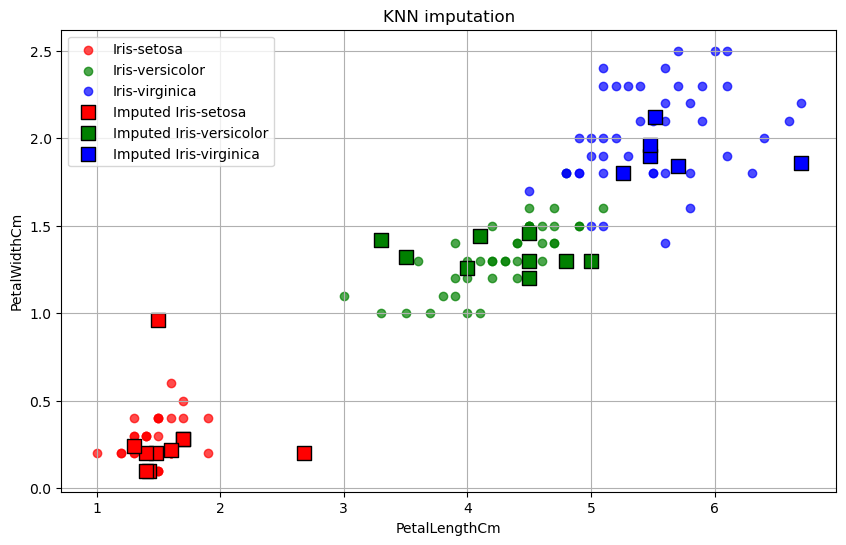

In [18]:
plot_with_replaced_values(irismissing,filled_by_knn,title="KNN imputation")

# Mice Imputation

In [25]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [26]:
missing_mask=irismissing.isna()
irissMicefilled=irismissing.copy()

In [27]:
def linearregression(X,Y):
    theta=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    return theta

In [ ]:
def miceimputer(df,max_iter=10):
    df_imputed = df.copy()
    # obtenir les columns avec missing values
    cols_with_missing = df.columns[df.isnull().any()].tolist()
    missing_info = {col: np.where(df[col].isnull())[0] for col in cols_with_missing}
    for col in cols_with_missing:
        df_imputed[col].fillna(df[col].mean(), inplace=True)
        
    for i in range(max_iter):
        for col in cols_with_missing:
            predictor_cols = [ c for c in df.columns if c!=col ]
            missingindc=missing_info[col]
            
            if len(missingindc) ==0:
                continue
            train_mask=df[col].notnull()
            x_train=df_imputed.loc[train_mask, predictor_cols].values
            y_train=df_imputed.loc[train_mask,col].values
            #ajouter les uns (intercept term)
            x_train = np.column_stack([np.ones(x_train.shape[0]), x_train])
            theta= linearregression(x_train,y_train)
            
            x_missing=df_imputed.loc[missingindc,predictor_cols].values
            x_missing=np.column_stack([np.ones(x_missing.shape[0]),x_missing])
            y_predict=x_missing@theta
            df_imputed.loc[missingindc,col]=y_predict
    
    return df_imputed.values
            
            
    
    
imputed_values=miceimputer(irissMicefilled.drop(columns="Species"),max_iter=10)

In [57]:
#imputer = IterativeImputer(max_iter=10, random_state=0)
#imputed_values = imputer.fit_transform(irissMicefilled.drop(columns="Species"))
imputed_values = np.c_[imputed_values,irissMicefilled.Species.values]

In [58]:
irissMicefilled=pd.DataFrame(imputed_values,columns=irismissing.columns)

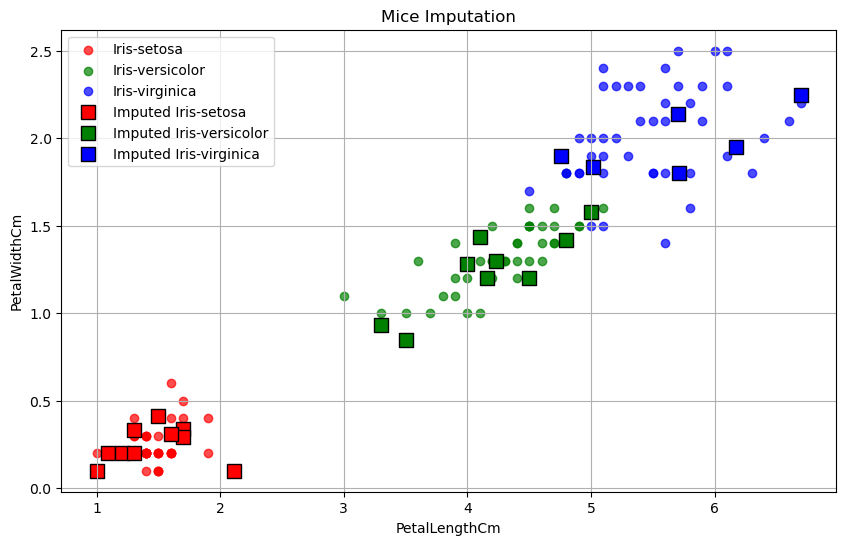

In [59]:
plot_with_replaced_values(irismissing,irissMicefilled,title="Mice Imputation")

# Matrix Decomposition

In [61]:
import numpy as np
import pandas as pd
from sklearn.utils.extmath import randomized_svd

def svd_impute(data, n_components=2, max_iter=100, tol=1e-4, random_state=None):
    """
    Perform SVD-based imputation of missing values
    
    Parameters:
    - data: Input DataFrame with missing values
    - n_components: Number of SVD components to use
    - max_iter: Maximum number of imputation iterations
    - tol: Convergence tolerance
    - random_state: Random seed for reproducibility
    
    Returns:
    - Imputed DataFrame
    """
    # Convert to numpy array
    X = data.copy().values
    mask = ~np.isnan(X)
    X_hat = np.where(mask, X, 0)  # Initial imputation with zeros
    
    for i in range(max_iter):
        # Perform SVD
        U, s, Vt = randomized_svd(X_hat, 
                                 n_components=n_components,
                                 random_state=random_state)
        
        # Reconstruct matrix
        X_reconstructed = U @ np.diag(s) @ Vt
        
        # Check for convergence
        if i > 0 and np.linalg.norm(X_hat[~mask] - X_reconstructed[~mask]) < tol:
            break
            
        # Update only the missing values
        X_hat[~mask] = X_reconstructed[~mask]
    
    # Return as DataFrame with original column names
    return pd.DataFrame(X_hat, columns=data.columns, index=data.index)

# Example usage:
# Assuming irismissing is your DataFrame with missing values
# and 'Species' column is non-numeric (should be excluded)

# 1. Separate features and species
species_col = irismissing['Species']
numeric_data = irismissing.drop(columns='Species')

# 2. Perform SVD imputation
imputed_data = svd_impute(numeric_data,max_iter=20, n_components=2, random_state=0)

# 3. Combine back with species column
irismissing_imputed = pd.concat([imputed_data, species_col], axis=1)


In [62]:
MDfiilled=np.c_[imputed_data,irismissing["Species"].values]
MDfiilled = pd.DataFrame(MDfiilled,columns=irismissing.columns)

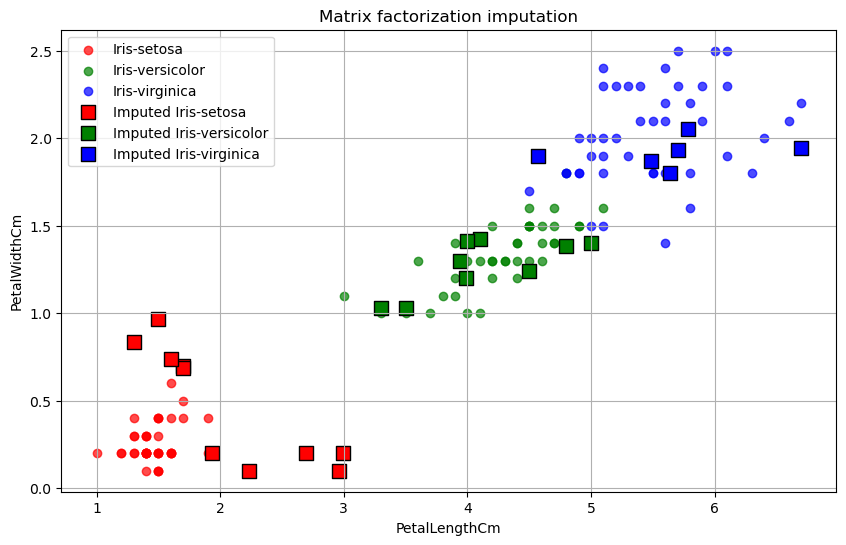

In [63]:
plot_with_replaced_values(irismissing,irismissing_imputed,title="Matrix factorization imputation")